## PubLayNet Dataset

In [1]:
# importing prerequisites
import sys
import requests
import tarfile
import json
import numpy as np
from os import path
from PIL import Image, ImageDraw, ImageFont
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
fname = 'examples.tar.gz'
url = 'https://dax-cdn.cdn.appdomain.cloud/dax-publaynet/1.0.0/' + fname
r = requests.get(url)
open(fname , 'wb').write(r.content)

6461141

In [3]:
# Extracting the dataset
tar = tarfile.open(fname)
tar.extractall()
tar.close()

In [4]:
# Verifying the file was extracted properly
data_path = "examples/"
path.exists(data_path)

True

## Visualizing the Data

In [5]:
# Define color code
colors = {'title': (255, 0, 0),
          'text': (0, 255, 0),
          'figure': (0, 0, 255),
          'table': (255, 255, 0),
          'list': (0, 255, 255)}

In [6]:
# Function to viz the annotation
# Function to visualize the annotation
def markup(image, annotations):
    ''' Draws the segmentation, bounding box, and label of each annotation
    '''
    draw = ImageDraw.Draw(image, 'RGBA')
    for annotation in annotations:
        # Draw segmentation
        draw.polygon(annotation['segmentation'][0],
                     fill=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (64,))
        # Draw bbox
        draw.rectangle(
            (annotation['bbox'][0],
             annotation['bbox'][1],
             annotation['bbox'][0] + annotation['bbox'][2],
             annotation['bbox'][1] + annotation['bbox'][3]),
            outline=colors[samples['categories'][annotation['category_id'] - 1]['name']] + (255,),
            width=2
        )
        # Draw label
        text = samples['categories'][annotation['category_id'] - 1]['name']
        bbox = draw.textbbox((0, 0), text, font=font)
        w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]
        if annotation['bbox'][3] < h:
            draw.rectangle(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + annotation['bbox'][2] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0] + annotation['bbox'][2],
                 annotation['bbox'][1]),
                text=text,
                fill=(255, 255, 255, 255),
                font=font
            )
        else:
            draw.rectangle(
                (annotation['bbox'][0],
                 annotation['bbox'][1],
                 annotation['bbox'][0] + w,
                 annotation['bbox'][1] + h),
                fill=(64, 64, 64, 255)
            )
            draw.text(
                (annotation['bbox'][0],
                 annotation['bbox'][1]),
                text=text,
                fill=(255, 255, 255, 255),
                font=font
            )
    return np.array(image)

In [7]:
# Parse the JSON file and read all the images and labels
with open('examples/samples.json', 'r') as fp:
    samples = json.load(fp)
# Index images
images = {}
for image in samples['images']:
    images[image['id']] = {'file_name': "examples/" + image['file_name'], 'annotations': []}
for ann in samples['annotations']:
    images[ann['image_id']]['annotations'].append(ann)

In [10]:
images[ann['image_id']]

{'file_name': 'examples/PMC5624106_00000.jpg',
 'annotations': [{'segmentation': [[62.36,
     266.01,
     545.32,
     266.01,
     545.32,
     279.96,
     545.26,
     279.96,
     545.26,
     290.01,
     545.29,
     290.01,
     545.29,
     303.96,
     545.29,
     303.96,
     545.29,
     315.96,
     545.29,
     315.96,
     545.29,
     327.96,
     545.27,
     327.96,
     545.27,
     338.01,
     545.29,
     338.01,
     545.29,
     350.01,
     545.34,
     350.01,
     545.34,
     363.96,
     545.32,
     363.96,
     545.32,
     375.96,
     545.25,
     375.96,
     545.25,
     386.01,
     545.31,
     386.01,
     545.31,
     399.96,
     545.3,
     399.96,
     545.3,
     410.01,
     545.3,
     410.01,
     545.3,
     422.01,
     545.31,
     422.01,
     545.31,
     435.96,
     110.95,
     435.96,
     110.95,
     447.96,
     62.36,
     447.96,
     62.36,
     434.01,
     62.36,
     422.01,
     62.36,
     410.01,
     62.36,
     398.

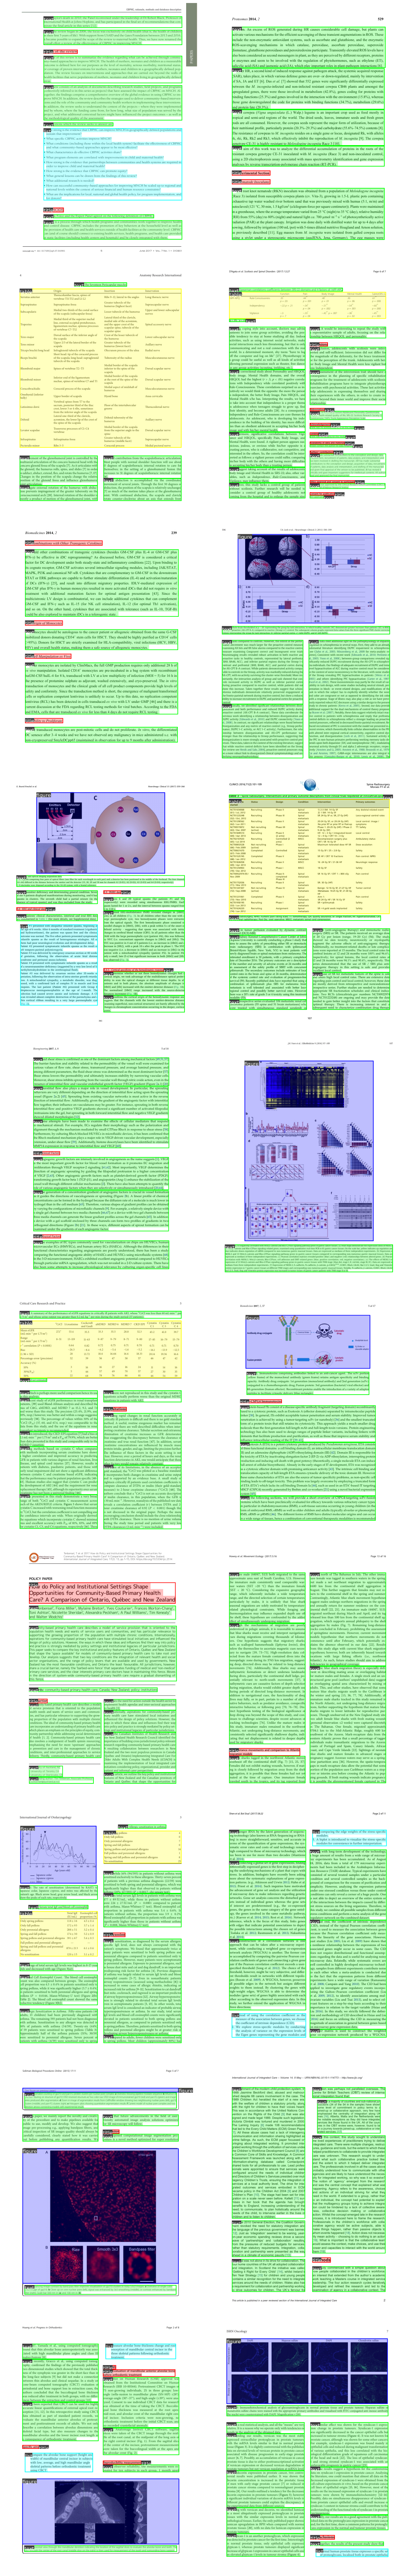

In [8]:
# Visualize annotations
font = ImageFont.truetype("examples/DejaVuSans.ttf", 15)
fig = plt.figure(figsize=(16, 100)) 
for i, (_, image) in enumerate(images.items()):
    with Image.open(image['file_name']) as img:
        ax = plt.subplot(int(len(images) / 2), 2, i + 1)
        ax.imshow(markup(img, image['annotations']))
        ax.axis('off')
plt.subplots_adjust(hspace=0, wspace=0)